# Proceso EDA

In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [408]:
#cargamos el dataset movies_df.csv
movies_df = pd.read_csv("transformed/movies_df.csv")

In [409]:
movies_df.shape

(416961, 18)

In [410]:
#Información general de cada columna
movies_df.info()
# Observaciones:
# Detectamos gran cantidad de nulos en las siguientes columnas:
# tagline, collection.name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416961 entries, 0 to 416960
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   budget                           416961 non-null  int64  
 1   id                               416961 non-null  int64  
 2   original_language                416869 non-null  object 
 3   overview                         414552 non-null  object 
 4   popularity                       416961 non-null  float64
 5   release_date                     416961 non-null  object 
 6   release_year                     416961 non-null  int64  
 7   revenue                          416961 non-null  float64
 8   tagline                          226823 non-null  object 
 9   title                            416961 non-null  object 
 10  vote_average                     416961 non-null  float64
 11  vote_count                       416961 non-null  float64
 12  co

In [411]:
# Vistazo a la data.
movies_df.head()

,budget,id,original_language,overview,popularity,release_date,release_year,revenue,tagline,title,vote_average,vote_count,collection.name,genres.name,production_companies.name,production_countries.iso_3166_1,spoken_languages.iso_639_1,return
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,1995,373554033.0,NaN,Toy Story,7.7,5415.0,Toy Story Collection,Animation,Pixar Animation Studios,US,en,12.451801
1,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,1995,373554033.0,NaN,Toy Story,7.7,5415.0,Toy Story Collection,Comedy,Pixar Animation Studios,US,en,12.451801
2,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,1995,373554033.0,NaN,Toy Story,7.7,5415.0,Toy Story Collection,Family,Pixar Animation Studios,US,en,12.451801
3,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,1995,262797249.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,NaN,Adventure,TriStar Pictures,US,en,4.043035
4,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,1995,262797249.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,NaN,Adventure,TriStar Pictures,US,fr,4.043035


In [412]:
# Verificacion de quartiles , minimos , maximos.
movies_df.describe()
# Observaciones:
# Las columnas budget, revenue y return presentan valores de 0 en gran cantidad del dataset. Esto lo podemos ver al observar los valores de min, y quartiles 0.25, 0.5.
# la columna popularidad parece tener outliers: Si observamos la distribucion de min, max y quartiles, observamos que hasta el quartile 0.75 el valor se encuentra en 
# valores menores a 10 con una media de 5.6, pero luego observamos un pico maximo de 500++. Esto podría generar ruido.
# vote_count parece otra columna con valores outliers. 

,budget,id,popularity,release_year,revenue,vote_average,vote_count,return
count,4.169610e+05,416961.000000,416961.000000,416961.000000,4.169610e+05,416961.000000,416961.000000,4.169610e+05
mean,1.425186e+07,79303.293601,5.654817,1999.396852,3.332955e+07,5.922046,321.901638,1.007286e+03
std,3.202859e+07,105793.540976,9.053237,17.064685,1.096328e+08,1.448900,867.802261,1.050413e+05
min,0.000000e+00,2.000000,0.000000,1874.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,9974.000000,0.958683,1995.000000,0.000000e+00,5.400000,8.000000,0.000000e+00
50%,0.000000e+00,33545.000000,3.511224,2004.000000,0.000000e+00,6.200000,34.000000,0.000000e+00
75%,1.200000e+07,90762.000000,8.333526,2010.000000,7.563728e+06,6.900000,197.000000,2.871533e-01
max,3.800000e+08,469172.000000,547.488298,2017.000000,2.787965e+09,10.000000,14075.000000,1.239638e+07


## Exploracion de valores numéricos
Decidimos iniciar con la exploración de valores numéricos ya que se tiene mayor facilidad que con la exploración de datos tipo texto.

### Relación general

In [413]:
# Tomamos solo valores numéricos.
eval_dataset = movies_df.select_dtypes(exclude='object').drop_duplicates()
eval_dataset.head()

,budget,id,popularity,release_year,revenue,vote_average,vote_count,return
0,30000000,862,21.946943,1995,373554033.0,7.7,5415.0,12.451801
3,65000000,8844,17.015539,1995,262797249.0,6.9,2413.0,4.043035
21,0,15602,11.712900,1995,0.0,6.5,92.0,0.000000
25,16000000,31357,3.859495,1995,81452156.0,6.1,34.0,5.090760
28,0,11862,8.387519,1995,76578911.0,5.7,173.0,0.000000


In [414]:
corr_matrix = eval_dataset.corr()
corr_matrix

,budget,id,popularity,release_year,revenue,vote_average,vote_count,return
budget,1.000000,-0.101523,0.449900,0.132826,0.768699,0.073294,0.676487,-0.002158
id,-0.101523,1.000000,-0.083593,0.284922,-0.071063,-0.167613,-0.064569,-0.006779
popularity,0.449900,-0.083593,1.000000,0.132499,0.506726,0.155187,0.560466,0.003195
release_year,0.132826,0.284922,0.132499,1.000000,0.089193,0.028096,0.107734,-0.005017
revenue,0.768699,-0.071063,0.506726,0.089193,1.000000,0.084090,0.811966,0.000776
vote_average,0.073294,-0.167613,0.155187,0.028096,0.084090,1.000000,0.124087,0.005616
vote_count,0.676487,-0.064569,0.560466,0.107734,0.811966,0.124087,1.000000,0.003581
return,-0.002158,-0.006779,0.003195,-0.005017,0.000776,0.005616,0.003581,1.000000


<Axes: >

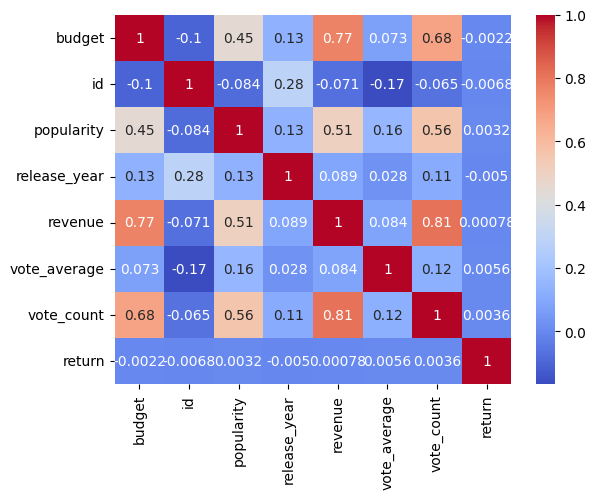

In [415]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

Observamos alta correlación entre: 
- revenue y budget. (A más inversión, mas ganancia.)
- revenue y vote_count (Más votantes indica mayor ganancia. Tiene sentido. Mayor gente vio la pelicula.)

### Correlación budget , revenue y return
Ya sabemos por anterioridad que la columna return resulta de la división de las dos columnas anteriores. Por lo cual optamos por eliminar return. Sospechamos que al eliminar revenue o budget podríamos perder información. Ya que estas guardan relación con otras variables, como vimos en la matriz de correlación general. Posteriormente para evitar overfit podemos aplicar métodos como PCA entre otros

In [416]:
# creamos modified_df. donde guardaremos nuestros cambios a medida que vayamos realizando nuestro EDA.
modified_df = movies_df.drop(columns=["return"])

### Distribución valores BUDGET

In [417]:
#tomamos los valores necesarios para evaluar
eval_df = modified_df[["title", "budget"]].drop_duplicates()
eval_df.shape

(42968, 2)

<Axes: xlabel='budget', ylabel='Count'>

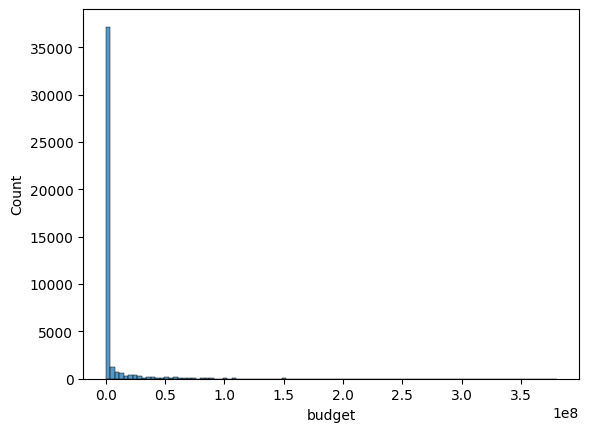

In [418]:
#detectamos que la gran cantidad de valores se concentra en budget cercano a 0, o muy por debajo de 50 millones millon
sns.histplot(data=eval_df, x="budget", bins=100)

In [419]:
# De hecho vemos que la gran mayoria de peliculas no tienen el valor de budget, ya que es 0. De hecho, el 80% de peliculas en el dataset figuran con un budget de 0.

zero_budget_movies = eval_df[eval_df["budget"]==0].shape[0]
total_movies = eval_df.shape[0]
zero_budget_movies / total_movies * 100

79.41025879724447

Esta gran cantidad de valores de 0, puede deberse a muchas cosas. 
1. Falta una gran cantidad de información
2. Estas películas se categarizaron con budget 0 al tener un budget muy reducido.
3. etc.

In [420]:
# Al revisar observamos que la opcion correcta es la primera. Ya que, "Dracula: Dead and Loving It" tuvo un presupuesto de 30 millones segun IMDb. 
# Por lo cual, no podemos confiar en esta información. Procedemos a descartarla.
eval_df[eval_df["budget"]==0]

,title,budget
21,Grumpier Old Men,0
28,Father of the Bride Part II,0
110,Tom and Huck,0
169,Dracula: Dead and Loving It,0
193,Balto,0
...,...,...
416904,The Burkittsville 7,0
416906,Caged Heat 3000,0
416955,Century of Birthing,0
416959,Satan Triumphant,0


In [421]:
#Dropeamos la columna budget.
modified_df.drop(columns=["budget"], inplace=True)

### Distribución columna REVENUE
Vamos a realizar un análisis similar al de BUDGET, para ver si tenemos valores relevantes en el dataset.

In [422]:
eval_df = modified_df[["title", "revenue"]].drop_duplicates()
eval_df.shape

(42802, 2)

<Axes: xlabel='revenue', ylabel='Count'>

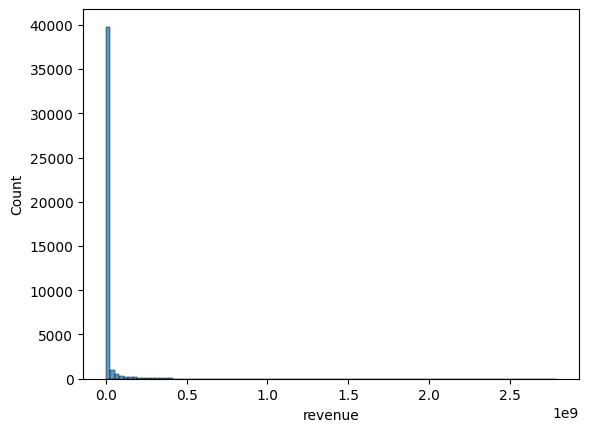

In [423]:
sns.histplot(data=eval_df, x="revenue", bins=100)

In [424]:
zero_revenue_movies = eval_df[eval_df["revenue"]==0].shape[0]
total_movies = eval_df.shape[0]
zero_revenue_movies / total_movies * 100

82.75314237652445

Observamos que un total del 82% de peliculas en el dataset muestran un revenue = 0. Nuevamente, es mucha información faltante. Lo que no será bueno dentro de nuestro algoritmo de ML.
Debido a que queremos simplificar el problema, y no se trata de una columna crítica como otras, vamos a proceder a descartar esta columna. 

In [425]:
modified_df.drop(columns=["revenue"], inplace=True)

### Distribución columna Popularidad

In [426]:
eval_df = modified_df[["title", "popularity"]].drop_duplicates()
eval_df.shape

(44920, 2)

<Axes: xlabel='popularity', ylabel='Count'>

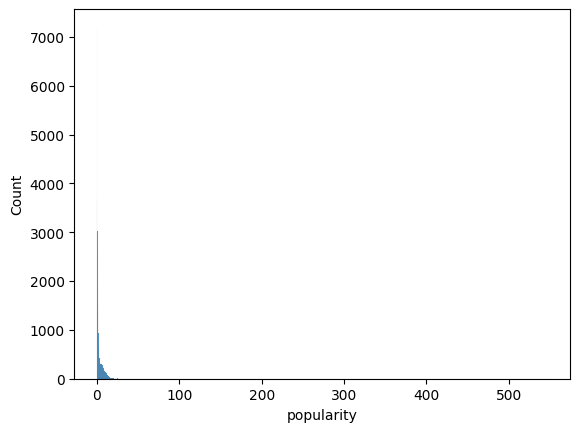

In [427]:
#Observamos que la gran mayoria de valores se encuentran entre 0 y 10, pero parece haber outliers. 
sns.histplot(data=eval_df, x="popularity")

<Axes: xlabel='popularity'>

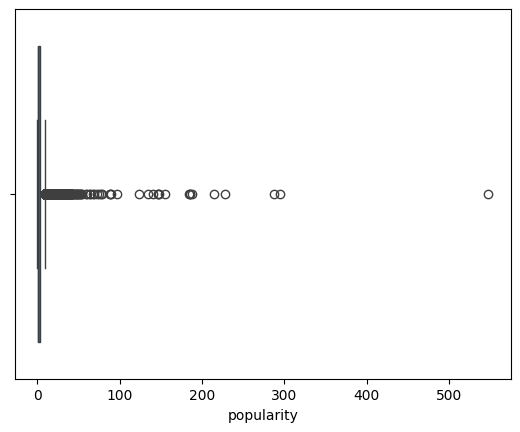

In [428]:
#Ploteamos un boxplot para observar estos valores atipicos , pero observamos que existe un numero considerable.
sns.boxplot(data=eval_df, x="popularity")

<Axes: xlabel='popularity'>

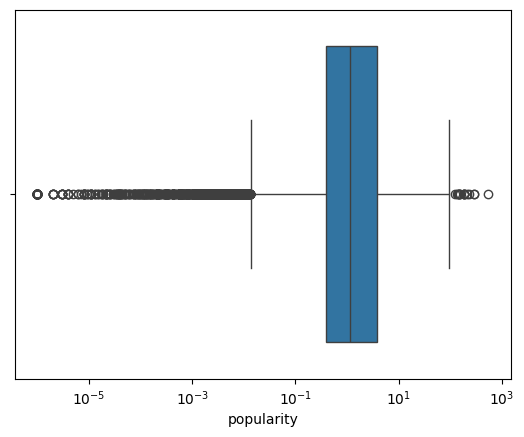

In [429]:
# Usamos escala logaritmica para visualizar los valores extremos de mejor manera.
sns.boxplot(data=eval_df, x="popularity", log_scale=10)

In [430]:
#Verificamos cuantos valores son mayores a un treshold. Un total de 3011.
eval_df[eval_df["popularity"]>10]

,title,popularity
0,Toy Story,21.946943
3,Jumanji,17.015539
21,Grumpier Old Men,11.712900
30,Heat,17.924927
127,GoldenEye,14.686036
...,...,...
415756,S.W.A.T.: Under Siege,20.386910
415797,Wish Upon,59.578823
415803,Girls Trip,37.964872
416051,Descendants 2,15.842073


Observamos que existen en efecto peliculas con un gran valor de popularidad, pero son peliculas taquilleras.
Sin embargo, no queremos que estos valores estén tan dispersos. Por lo que, posiblemente amerite una transformación.
Validando las opciones que tenemos, no creo que sea una buena opción usar escaladores como minmax, o standard scaler, ya que son muy susceptibles a outliers.
Ya que tenemos una buena visualización de los valores con un escala logaritmica, optamos por hacer una transformación de este tipo.

In [431]:
#Escalado logarítmico.
eval_df['popularity_log'] = np.log1p(eval_df['popularity'])  # log1p es log(x + 1)

In [432]:
#observamos los quartiles.
eval_df['popularity_log'].describe()

count    44920.000000
mean         0.984947
std          0.804524
min          0.000000
25%          0.332254
50%          0.760315
75%          1.556095
max          6.307166
Name: popularity_log, dtype: float64

<Axes: xlabel='popularity_log', ylabel='Count'>

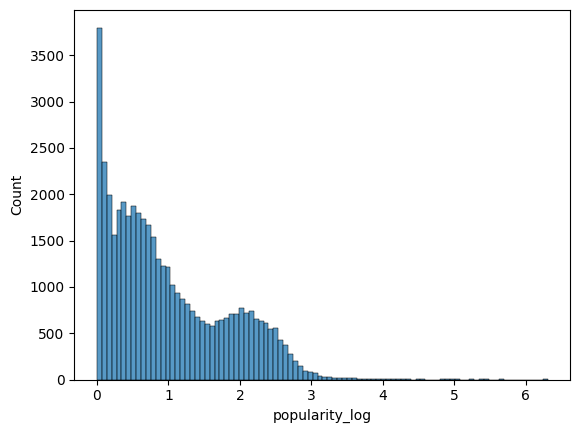

In [433]:
#ploteamos los valores para ver la distribución.
sns.histplot(data=eval_df, x="popularity_log")

In [434]:
#es una opcion convincente por lo cual aplicamos la transformación al dataset.
modified_df['popularity_log'] = np.log1p(modified_df['popularity'])
modified_df.drop(columns="popularity", inplace=True)

### Distribución columna vote_count

In [435]:
eval_df = modified_df[["title", "vote_count"]].drop_duplicates()
eval_df.shape

(44793, 2)

<Axes: xlabel='vote_count', ylabel='Count'>

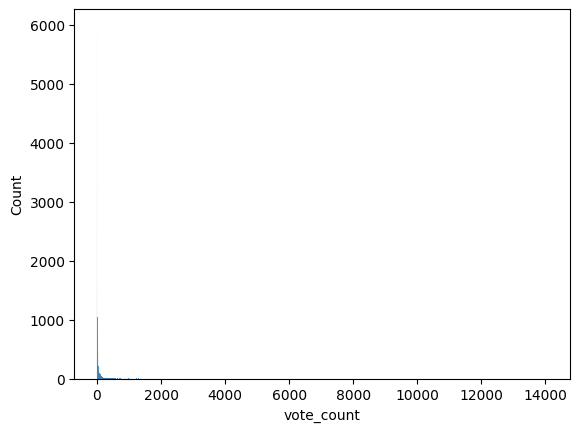

In [436]:
# ploteamos la distribución de vote_count, observamos que parece haber outliers como esperabamos.
sns.histplot(data=eval_df, x="vote_count")

<Axes: xlabel='vote_count'>

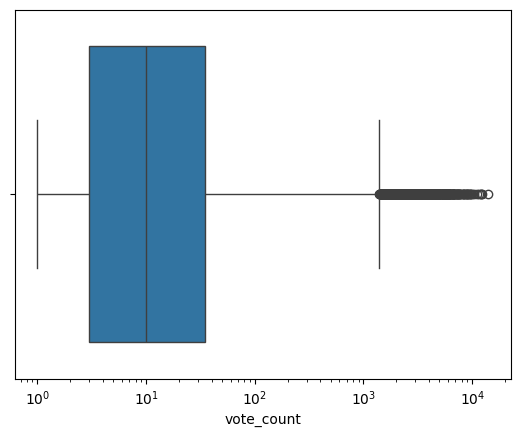

In [437]:
sns.boxplot(data=eval_df, x="vote_count", log_scale=10)

In [438]:
# graficamente observamos que los outliers estarían aproximadamente sobre 1000
# visualizamos la cantidad de valores "outliers"
eval_df[eval_df["vote_count"]>1000].shape[0]
#tenemos un total de 1120 peliculas con mas de 1000 votos, lo que son pocos valores.
#Optamos por realizar un reescalado.

1120

Escalamos logaritmicamente

In [439]:
eval_df['vote_count_scaled'] = np.log1p(eval_df['vote_count'])  # log1p es log(x + 1)

<Axes: xlabel='vote_count_scaled', ylabel='Count'>

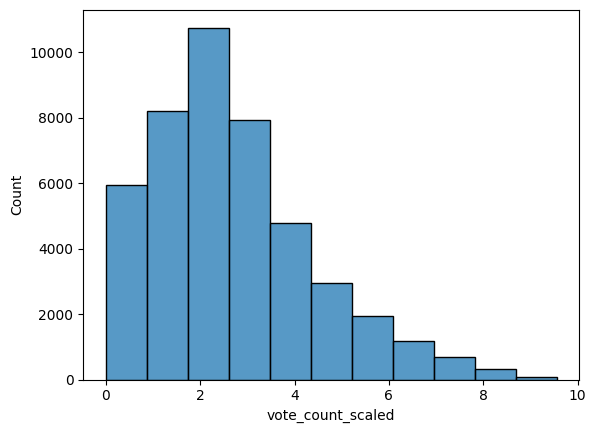

In [440]:
sns.histplot(data=eval_df["vote_count_scaled"], bins = 11)

<Axes: ylabel='vote_count_scaled'>

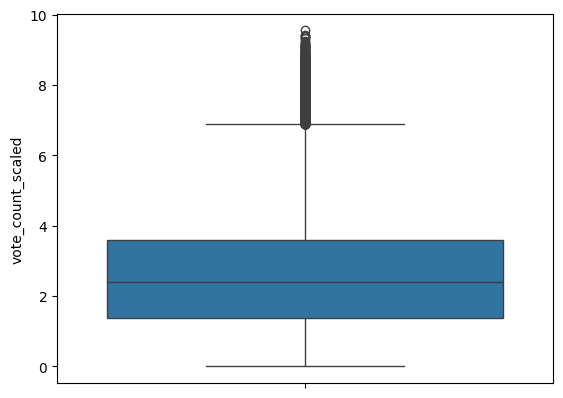

In [441]:
sns.boxplot(data=eval_df["vote_count_scaled"])

In [442]:
# Aplicamos la transformación al dataset requerido.
modified_df["vote_count_log"] =  np.log1p(modified_df['vote_count'])
modified_df.drop(columns=["vote_count"],inplace=True)


### Ultimo vistazo a los datos numéricos

In [443]:
modified_df.describe()

,id,release_year,vote_average,popularity_log,vote_count_log
count,416961.000000,416961.000000,416961.000000,416961.000000,416961.000000
mean,79303.293601,1999.396852,5.922046,1.496531,3.789719
std,105793.540976,17.064685,1.448900,0.879061,2.039733
min,2.000000,1874.000000,0.000000,0.000000,0.000000
25%,9974.000000,1995.000000,5.400000,0.672272,2.197225
50%,33545.000000,2004.000000,6.200000,1.506569,3.555348
75%,90762.000000,2010.000000,6.900000,2.233613,5.288267
max,469172.000000,2017.000000,10.000000,6.307166,9.552226


## Exploración de Texto

In [444]:
eval_dataset = modified_df.select_dtypes(include='object').drop_duplicates()
eval_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416453 entries, 0 to 416960
Data columns (total 10 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   original_language                416361 non-null  object
 1   overview                         414044 non-null  object
 2   release_date                     416453 non-null  object
 3   tagline                          226734 non-null  object
 4   title                            416453 non-null  object
 5   collection.name                  54091 non-null   object
 6   genres.name                      413411 non-null  object
 7   production_companies.name        390039 non-null  object
 8   production_countries.iso_3166_1  405391 non-null  object
 9   spoken_languages.iso_639_1       409978 non-null  object
dtypes: object(10)
memory usage: 35.0+ MB


### Columna original_language 

In [445]:
eval_df = modified_df[["title", "original_language"]].drop_duplicates()

In [446]:
#Visualizamos los valores unicos, hay bastante variedad de valores
eval_df["original_language"].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

<Axes: xlabel='original_language', ylabel='count'>

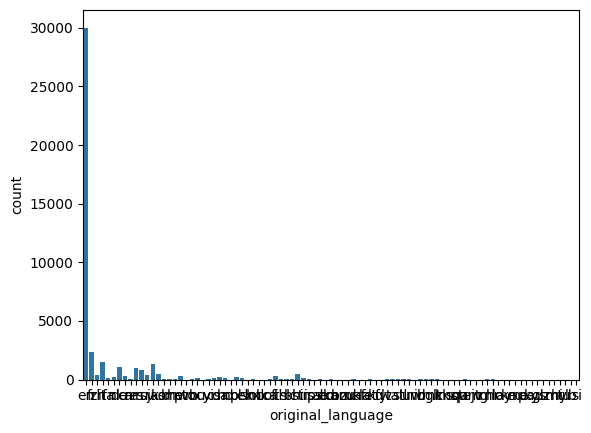

In [447]:
# observamos que la gran mayoria de peliculas se producen en ingles. un total de 30000 valores.
sns.countplot(data=eval_df, x="original_language")

In [448]:
eval_df[eval_df["original_language"]=='en'].count()

title                30020
original_language    30020
dtype: int64

In [449]:
# Revision de valores nulos.
eval_df[eval_df["original_language"].isnull()]

,title,original_language
237573,Shadowing the Third Man,NaN
252468,Unfinished Sky,NaN
286840,13 Fighting Men,NaN
345036,Lambchops,NaN
372698,Prince Bayaya,NaN
392801,Song of Lahore,NaN
397618,Annabelle Serpentine Dance,NaN
410009,Lettre d'une inconnue,NaN
411868,Yarn,NaN
412680,WiNWiN,NaN


In [450]:
# Vamos a imputar estos valores a un valor distinto, "missing", que no influya en la seleccion de peliculas dentro de nuestro algoritmo.
# En la practica tratariamos de rellenar estos valores con otra base de datos online posiblemente.

modified_df["original_language"].fillna(value="missing", inplace=True)

C:\Users\Une\AppData\Local\Temp\ipykernel_29360\1522568990.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  modified_df["original_language"].fillna(value="missing", inplace=True)


### Overview

In [451]:
eval_df = modified_df[["title", "overview"]].drop_duplicates()
eval_df.head()

,title,overview
0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
3,Jumanji,When siblings Judy and Peter discover an encha...
21,Grumpier Old Men,A family wedding reignites the ancient feud be...
25,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
28,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [452]:
# Nulos.
eval_df["overview"].isna().sum()
# Observación: Debemos imputar valores nulos. Los convertimos en un string vacio: "".

np.int64(904)

In [453]:
eval_df["overview"].fillna("", inplace=True)

C:\Users\Une\AppData\Local\Temp\ipykernel_29360\1492768369.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  eval_df["overview"].fillna("", inplace=True)


In [454]:
# queremos ver la longitud de estos overviews. Creamos la siguiente función.
def count_chars(row):
    try:
        return len(row["overview"])
    except:
        return 0


In [455]:
eval_df["overview_char_count"] = eval_df.apply(count_chars, axis=1)

In [456]:
eval_df.head()

,title,overview,overview_char_count
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",303
3,Jumanji,When siblings Judy and Peter discover an encha...,395
21,Grumpier Old Men,A family wedding reignites the ancient feud be...,327
25,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",270
28,Father of the Bride Part II,Just when George Banks has recovered from his ...,318


In [457]:
#los datos parecen aceptables. un minimo de 0 , maximo de 1000. media de 276.
eval_df.describe()

,overview_char_count
count,44895.000000
mean,316.540929
std,207.455079
min,0.000000
25%,153.000000
50%,276.000000
75%,425.000000
max,1000.000000


¿Qué hacemos con esta columna?

Queremos hacer un tratamiento de datos de tipo texto que nos permita reducir el tamaño y facilitar el trabajo de nuestro algoritmo.

Vamos a realizar:

- Convertir a minúsculas
- Eliminar caracteres especiales
- Eliminar stopwords
- Lematización


#### Convertir a minúsculas

In [458]:
#Hacemos uso de los métodos de pandas str.lower.
eval_df["overview"]=eval_df["overview"].str.lower()
eval_df.head()

,title,overview,overview_char_count
0,Toy Story,"led by woody, andy's toys live happily in his ...",303
3,Jumanji,when siblings judy and peter discover an encha...,395
21,Grumpier Old Men,a family wedding reignites the ancient feud be...,327
25,Waiting to Exhale,"cheated on, mistreated and stepped on, the wom...",270
28,Father of the Bride Part II,just when george banks has recovered from his ...,318


#### Eliminar caracteres especiales

In [459]:
#usamos REGEX y str.replace para eliminar caracteres especiales
eval_df["overview"] = eval_df["overview"].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
eval_df.head()

,title,overview,overview_char_count
0,Toy Story,led by woody andys toys live happily in his ro...,303
3,Jumanji,when siblings judy and peter discover an encha...,395
21,Grumpier Old Men,a family wedding reignites the ancient feud be...,327
25,Waiting to Exhale,cheated on mistreated and stepped on the women...,270
28,Father of the Bride Part II,just when george banks has recovered from his ...,318


#### Eliminar STOPWORDS y LEMATIZACION
Para este caso vamos a hacer uso de la libreria SpaCy

In [460]:
#importamos.
import spacy
nlp = spacy.load("en_core_web_sm")

In [461]:
#creamos un objeto tokenizado de spacy
text_example = eval_df.loc[0]["overview"]
doc = nlp(text_example)
type(doc)

spacy.tokens.doc.Doc

In [462]:
# podemos visualizar los tokens que son stopwords:
for token in doc:
    print(token.is_stop)

False
True
False
False
False
False
False
True
True
False
True
False
False
False
False
False
True
True
False
False
True
False
True
False
True
False
False
False
False
True
False
True
True
False
False
False
True
False
True
True
False
True
False
False
False
True
True
False
True
False


In [463]:
# de esta manera podemos remover stop words y aplicamos lemmatización.
non_stopword_text = [token.lemma_ for token in doc if not token.is_stop]
" ".join(non_stopword_text)

'lead woody andys toy live happily room andys birthday bring buzz lightyear scene afraid lose place andys heart woody plot buzz circumstance separate buzz woody owner duo eventually learn aside difference'

In [464]:
#visualizamos la lista de palabras.
print(non_stopword_text)
print(len(non_stopword_text))

['lead', 'woody', 'andys', 'toy', 'live', 'happily', 'room', 'andys', 'birthday', 'bring', 'buzz', 'lightyear', 'scene', 'afraid', 'lose', 'place', 'andys', 'heart', 'woody', 'plot', 'buzz', 'circumstance', 'separate', 'buzz', 'woody', 'owner', 'duo', 'eventually', 'learn', 'aside', 'difference']
31


In [465]:
# Creamos una funcion que aplicaremos al dataset completo, fila por fila.
def lenma_and_remove_stopwords(text):
    if isinstance(text, str):
        doc = nlp(text)
        clean_word_list = [token.lemma_ for token in doc if not token.is_stop]
    #clean_text = " ".join(clean_word_list)
        return clean_word_list
    else:
        return list()


In [466]:
#probamos en nuestro dataset de prueba. Nos interesa validar cuanto tiempo demora el proceso tmbn.
eval_df["overview"].head(1000).apply(lenma_and_remove_stopwords)
# nos toma 8 segundos para 1000 filas.
# es posible nos tome alrededor de 6 minutos para todo el dataset.

0        [lead, woody, andys, toy, live, happily, room,...
3        [sibling, judy, peter, discover, enchanted, bo...
21       [family, wedding, reignite, ancient, feud, nex...
25       [cheat, mistreat, step, woman, hold, breath, w...
28       [george, bank, recover, daughter, wed, receive...
                               ...                        
11325    [pete, young, orphan, run, away, maine, fishin...
11329    [child, evacuate, london, world, war, ii, forc...
11335    [golden, afternoon, young, alice, follow, whit...
11343    [feisty, little, fox, name, tod, adopt, farm, ...
11347    [follow, arrest, mother, ramona, young, vaness...
Name: overview, Length: 1000, dtype: object

In [467]:
eval_df["overview"].apply(lenma_and_remove_stopwords)
# efectivamente tomo 6 minutos.
# aplicaremos este tratamiento al final

0         [lead, woody, andys, toy, live, happily, room,...
3         [sibling, judy, peter, discover, enchanted, bo...
21        [family, wedding, reignite, ancient, feud, nex...
25        [cheat, mistreat, step, woman, hold, breath, w...
28        [george, bank, recover, daughter, wed, receive...
                                ...                        
416907    [version, classic, epic, variation, interestin...
416955    [artist, struggle, finish, work, storyline, cu...
416956    [hit, go, wrong, professional, assassin, end, ...
416959    [small, town, live, brother, minister, hunchba...
416960    [50, year, decriminalisation, homosexuality, u...
Name: overview, Length: 44895, dtype: object

### Columna Tagline

In [468]:
eval_df = modified_df[["title", "tagline"]].drop_duplicates()

In [469]:
# Observamos que alrededor de la mitad de valores son nulos. 
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44016 entries, 0 to 416960
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44016 non-null  object
 1   tagline  20272 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [470]:
# para este caso en particular, y con la finaldiad de reducir el tamaño del dataset, optaremos por eliminar esta columna
modified_df.drop(columns="tagline", inplace=True)

### Release Date

In [471]:
#Esta columna será removida, ya que contamos con el dato release_year que se usará para el análisis.
modified_df.drop(columns="release_date", inplace=True)

### Collection name

In [472]:
eval_df = modified_df[["title", "collection.name"]].drop_duplicates()

In [473]:
# observamos una gran cantidad de valores nulos.
eval_df.isnull().sum()

title                  0
collection.name    37622
dtype: int64

In [474]:
#visualizamos los datos en comparacion con el titulo. Vemos que muchas peliculas, comparten nombres similares con sus collection name.
eval_df[eval_df["collection.name"].notnull()]

,title,collection.name
0,Toy Story,Toy Story Collection
21,Grumpier Old Men,Grumpy Old Men Collection
28,Father of the Bride Part II,Father of the Bride Collection
127,GoldenEye,James Bond Collection
193,Balto,Balto Collection
...,...,...
416544,Carry On Follow That Camel,The Carry On Collection
416554,Carry On Camping,The Carry On Collection
416576,Carry On England,The Carry On Collection
416578,LEGO DC Super Hero Girls: Brain Drain,DC Super Hero Girls Collection


In [475]:
# Optamos por unir las columnas titles y collection name. Posteriormente aplicaremos también nuestra funcion para tokenizar y reducir el tamaño de esta columna.
eval_df["concat_title_collection"] = eval_df["title"] + " " + eval_df["collection.name"].fillna("")
eval_df.head(5)

,title,collection.name,concat_title_collection
0,Toy Story,Toy Story Collection,Toy Story Toy Story Collection
3,Jumanji,NaN,Jumanji
21,Grumpier Old Men,Grumpy Old Men Collection,Grumpier Old Men Grumpy Old Men Collection
25,Waiting to Exhale,NaN,Waiting to Exhale
28,Father of the Bride Part II,Father of the Bride Collection,Father of the Bride Part II Father of the Brid...


In [476]:
# Aplicamos a nuestro dataset
modified_df["title_collection"]= modified_df["title"] + " " + modified_df["collection.name"].fillna("")
# dropeamos las columnas no necesarias
modified_df.drop(columns=["title", "collection.name"], inplace=True)
modified_df.head()

,id,original_language,overview,release_year,vote_average,genres.name,production_companies.name,production_countries.iso_3166_1,spoken_languages.iso_639_1,popularity_log,vote_count_log,title_collection
0,862,en,"Led by Woody, Andy's toys live happily in his ...",1995,7.7,Animation,Pixar Animation Studios,US,en,3.133185,8.597113,Toy Story Toy Story Collection
1,862,en,"Led by Woody, Andy's toys live happily in his ...",1995,7.7,Comedy,Pixar Animation Studios,US,en,3.133185,8.597113,Toy Story Toy Story Collection
2,862,en,"Led by Woody, Andy's toys live happily in his ...",1995,7.7,Family,Pixar Animation Studios,US,en,3.133185,8.597113,Toy Story Toy Story Collection
3,8844,en,When siblings Judy and Peter discover an encha...,1995,6.9,Adventure,TriStar Pictures,US,en,2.891235,7.789040,Jumanji
4,8844,en,When siblings Judy and Peter discover an encha...,1995,6.9,Adventure,TriStar Pictures,US,fr,2.891235,7.789040,Jumanji


### Columnas. Genres, Production_companies, Production_countries, Spoken_languages.
Estas columnas se encontraban previamente anidadas. Vamos a revisar las columnas y posteriormente resumiarlas en sets.

In [477]:
# cargamos el dataset.
eval_df = modified_df[["id", "genres.name", "production_companies.name", "production_countries.iso_3166_1", 'spoken_languages.iso_639_1' ]]

print(eval_df.shape)
eval_df.head()

(416961, 5)


,id,genres.name,production_companies.name,production_countries.iso_3166_1,spoken_languages.iso_639_1
0,862,Animation,Pixar Animation Studios,US,en
1,862,Comedy,Pixar Animation Studios,US,en
2,862,Family,Pixar Animation Studios,US,en
3,8844,Adventure,TriStar Pictures,US,en
4,8844,Adventure,TriStar Pictures,US,fr


#### Generos

In [478]:
#vemos valores nulos. Imputamos con un valor desconocido: "Unknown"
eval_df["genres.name"].unique()

array(['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
       'Science Fiction', 'Mystery', 'War', 'Foreign', nan, 'Music',
       'Documentary', 'Western', 'TV Movie'], dtype=object)

In [479]:
eval_df["genres.name"].fillna("Unknown")

0         Animation
1            Comedy
2            Family
3         Adventure
4         Adventure
            ...    
416956       Action
416957        Drama
416958     Thriller
416959      Unknown
416960      Unknown
Name: genres.name, Length: 416961, dtype: object

In [480]:
#replicamos en nuestro dataset modificado.
modified_df["genres.name"] = modified_df["genres.name"].fillna("Unknown")

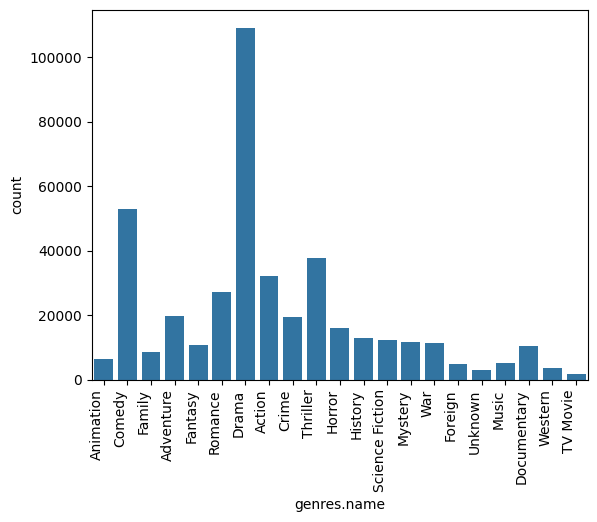

In [481]:
# Damos un ojo a la distribución de géneros observando una distribución aceptable.
sns.countplot(data=modified_df, x="genres.name")
plt.xticks(rotation=90, ha="right")
plt.show()

#### Production Companies

In [482]:
# Vemos una cantidad pequeña de nulos.
eval_df[["id", "production_companies.name"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416961 entries, 0 to 416960
Data columns (total 2 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   id                         416961 non-null  int64 
 1   production_companies.name  390531 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


In [483]:
# Vemos un total de 23420 productoras distintas. Una gran diversidad.
eval_df["production_companies.name"].unique().shape

(23420,)

In [484]:
# Para este caso vamos a optar simplemente por llenar los valores vacios con "Missing"
modified_df["production_companies.name"] = modified_df["production_companies.name"].fillna("Missing")

#### Production countries y spoken_languages

In [485]:
# Vemos cierta similitud en production countries y spoken_languages, ya que se encuentran en el mismo formato.
# De hecho nos recuerda tambien a: original_language
eval_df = modified_df[["id", "original_language", "production_countries.iso_3166_1", "spoken_languages.iso_639_1" ]]
eval_df.head(5)


,id,original_language,production_countries.iso_3166_1,spoken_languages.iso_639_1
0,862,en,US,en
1,862,en,US,en
2,862,en,US,en
3,8844,en,US,en
4,8844,en,US,fr


In [486]:
# vamos a observar la distribucion de valores en primer lugar.

<Axes: xlabel='production_countries.iso_3166_1', ylabel='count'>

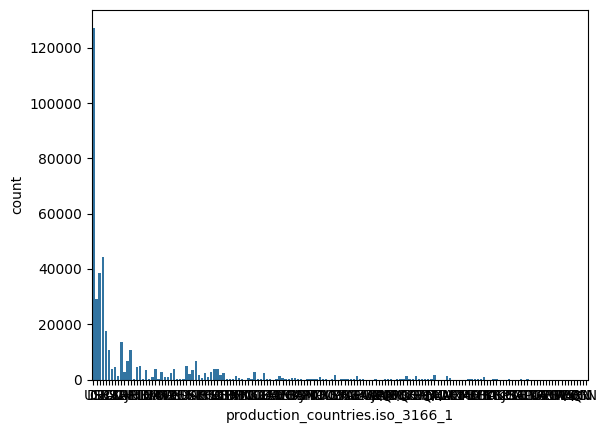

In [487]:
# se observa una gran variedad. en paises de produccion.
sns.countplot(data=eval_df, x="production_countries.iso_3166_1")

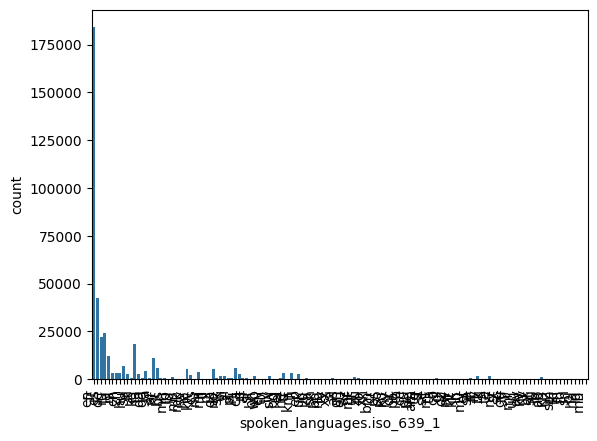

In [488]:
#de la misma manera en spoken_languages
sns.countplot(data=eval_df, x="spoken_languages.iso_639_1")
plt.xticks(rotation=90, ha="right")
plt.show()

In [489]:
# procedemos a unir las 3 columnas de la siguiente manera. 
eval_df["concat_country_language"] = eval_df["original_language"].str.lower() +   " " + eval_df["production_countries.iso_3166_1"].str.lower() +  " " + eval_df["spoken_languages.iso_639_1"].str.lower()

C:\Users\Une\AppData\Local\Temp\ipykernel_29360\2744695671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_df["concat_country_language"] = eval_df["original_language"].str.lower() +   " " + eval_df["production_countries.iso_3166_1"].str.lower() +  " " + eval_df["spoken_languages.iso_639_1"].str.lower()


In [490]:
eval_df["concat_country_language"].fillna("", inplace=True)

C:\Users\Une\AppData\Local\Temp\ipykernel_29360\2754961421.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  eval_df["concat_country_language"].fillna("", inplace=True)
C:\Users\Une\AppData\Local\Temp\ipykernel_29360\2754961421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_df["concat_country_language"].fillna("", inplace=True)


In [491]:
result = eval_df.groupby("id").agg(concat=("concat_country_language", " ".join))

In [492]:
result.reset_index(inplace=True)

In [493]:
result.loc[0]["concat"]

'fi fi fi fi fi de fi fi fi fi fi de fi fi fi fi fi de fi fi fi fi fi de'

In [494]:
# Realizamos un proceso para unir todo en un set y tener una informacion resumida.
result["concat"].apply(lambda x: set(x.split()))

0            {de, fi}
1        {sv, en, fi}
2            {en, us}
3        {en, jp, us}
4            {en, us}
             ...     
44902        {en, gb}
44903        {en, us}
44904              {}
44905            {fi}
44906        {fr, pt}
Name: concat, Length: 44907, dtype: object

In [495]:
#Aplicamos el algoritmo al dataset deseado.
modified_df["concat_country_language"] = modified_df["original_language"].str.lower() +   " " + modified_df["production_countries.iso_3166_1"].str.lower() +  " " + modified_df["spoken_languages.iso_639_1"].str.lower()

In [496]:
modified_df.drop(columns=["original_language","production_countries.iso_3166_1", "spoken_languages.iso_639_1"], inplace=True)

In [497]:
modified_df["concat_country_language"] = modified_df["concat_country_language"].fillna("")

In [498]:
modified_df

,id,overview,release_year,vote_average,genres.name,production_companies.name,popularity_log,vote_count_log,title_collection,concat_country_language
0,862,"Led by Woody, Andy's toys live happily in his ...",1995,7.7,Animation,Pixar Animation Studios,3.133185,8.597113,Toy Story Toy Story Collection,en us en
1,862,"Led by Woody, Andy's toys live happily in his ...",1995,7.7,Comedy,Pixar Animation Studios,3.133185,8.597113,Toy Story Toy Story Collection,en us en
2,862,"Led by Woody, Andy's toys live happily in his ...",1995,7.7,Family,Pixar Animation Studios,3.133185,8.597113,Toy Story Toy Story Collection,en us en
3,8844,When siblings Judy and Peter discover an encha...,1995,6.9,Adventure,TriStar Pictures,2.891235,7.789040,Jumanji,en us en
4,8844,When siblings Judy and Peter discover an encha...,1995,6.9,Adventure,TriStar Pictures,2.891235,7.789040,Jumanji,en us fr
...,...,...,...,...,...,...,...,...,...,...
416956,67758,"When one of her hits goes wrong, a professiona...",2003,3.8,Action,American World Pictures,0.643435,1.945910,Betrayal,en us en
416957,67758,"When one of her hits goes wrong, a professiona...",2003,3.8,Drama,American World Pictures,0.643435,1.945910,Betrayal,en us en
416958,67758,"When one of her hits goes wrong, a professiona...",2003,3.8,Thriller,American World Pictures,0.643435,1.945910,Betrayal,en us en
416959,227506,"In a small town live two brothers, one a minis...",1917,0.0,Unknown,Yermoliev,0.003497,0.000000,Satan Triumphant,


#### Agregacion

In [499]:
modified_df.shape

(416961, 10)

In [500]:
modified_df = modified_df.groupby(["id", "overview", "release_year", "vote_average", "popularity_log", "vote_count_log", "title_collection", ]).agg(
    concat_country_language=("concat_country_language", " ".join),
    genres=("genres.name", set),
    production_companies=("production_companies.name", set),
).reset_index()#genres, production_companies, concat_country
modified_df.head()

,id,overview,release_year,vote_average,popularity_log,vote_count_log,title_collection,concat_country_language,genres,production_companies
0,2,Taisto Kasurinen is a Finnish coal miner whose...,1988,7.1,1.581139,3.806662,Ariel,fi fi fi fi fi de fi fi fi fi fi de fi fi fi f...,"{Drama, Crime}","{Finnish Film Foundation, Villealfa Filmproduc..."
1,3,"An episode in the life of Nikander, a garbage ...",1986,7.1,1.191529,3.583519,Shadows in Paradise,fi fi en fi fi fi fi fi sv fi fi en fi fi fi f...,"{Comedy, Drama}",{Villealfa Filmproduction Oy}
2,5,It's Ted the Bellhop's first night on the job....,1995,6.5,2.305240,6.291569,Four Rooms,en us en en us en en us en en us en,"{Comedy, Crime}","{Miramax Films, A Band Apart}"
3,6,"While racing to a boxing match, Frank, Mike, J...",1993,6.4,1.877734,4.382027,Judgment Night,en jp en en us en en jp en en us en en jp en e...,"{Action, Crime, Thriller}","{Universal Pictures, Largo Entertainment, JVC ..."
4,11,Princess Leia is captured and held hostage by ...,1977,8.1,3.764675,8.821585,Star Wars Star Wars Collection,en us en en us en en us en en us en en us en e...,"{Action, Adventure, Science Fiction}","{Lucasfilm, Twentieth Century Fox Film Corpora..."


In [501]:
# Modificamos la columna concat_country_language para resumir valores. usamos set, lo que evita valores repetitivos.
modified_df["concat_country_language"] = modified_df["concat_country_language"].apply(lambda x: set(x.split()))

In [502]:
modified_df.head()

,id,overview,release_year,vote_average,popularity_log,vote_count_log,title_collection,concat_country_language,genres,production_companies
0,2,Taisto Kasurinen is a Finnish coal miner whose...,1988,7.1,1.581139,3.806662,Ariel,"{de, fi}","{Drama, Crime}","{Finnish Film Foundation, Villealfa Filmproduc..."
1,3,"An episode in the life of Nikander, a garbage ...",1986,7.1,1.191529,3.583519,Shadows in Paradise,"{sv, en, fi}","{Comedy, Drama}",{Villealfa Filmproduction Oy}
2,5,It's Ted the Bellhop's first night on the job....,1995,6.5,2.305240,6.291569,Four Rooms,"{en, us}","{Comedy, Crime}","{Miramax Films, A Band Apart}"
3,6,"While racing to a boxing match, Frank, Mike, J...",1993,6.4,1.877734,4.382027,Judgment Night,"{en, jp, us}","{Action, Crime, Thriller}","{Universal Pictures, Largo Entertainment, JVC ..."
4,11,Princess Leia is captured and held hostage by ...,1977,8.1,3.764675,8.821585,Star Wars Star Wars Collection,"{en, us}","{Action, Adventure, Science Fiction}","{Lucasfilm, Twentieth Century Fox Film Corpora..."


In [503]:
modified_df.shape

(44013, 10)

In [504]:
#Detectamos duplicados.
eval_df = modified_df[["overview", "id"]].groupby("id").count().reset_index()

In [505]:
eval_df[eval_df["overview"]>1]

,id,overview
2122,4912,2
4551,10991,2
5571,12600,2
5840,13209,2
6763,14788,2
6894,15028,2
9982,22649,2
24038,69234,2
25430,77221,2
26696,84198,2


In [506]:
modified_df[modified_df["id"]==4912]

,id,overview,release_year,vote_average,popularity_log,vote_count_log,title_collection,concat_country_language,genres,production_companies
2122,4912,"Television made him famous, but his biggest hi...",2002,6.6,2.157077,5.641907,Confessions of a Dangerous Mind,"{en, us}","{Comedy, Drama, Crime, Romance, Thriller}","{Miramax Films, Mad Chance, Allied Filmmakers}"
2123,4912,"Television made him famous, but his biggest hi...",2002,6.6,2.512122,5.641907,Confessions of a Dangerous Mind,"{en, us}","{Comedy, Drama, Crime, Romance, Thriller}","{Miramax Films, Mad Chance, Allied Filmmakers}"


In [507]:
#No podemos usar drop_duplicates debido a que tenemos SETs, los cuales no son HASHABLES.
try: 
    modified_df.drop_duplicates()
except TypeError as e:
    print(e)

unhashable type: 'set'


In [508]:
# Convertimos a tuplas, de esta manera se vuelven hashables.
modified_df["genres"]=modified_df["genres"].apply(tuple)
modified_df["production_companies"] = modified_df["production_companies"].apply(tuple)
modified_df["concat_country_language"] = modified_df["concat_country_language"].apply(tuple)

In [509]:
# removemos duplicados.
modified_df=modified_df.drop_duplicates().reset_index(drop=True)

In [510]:
print(modified_df.shape)
modified_df.head()

(44013, 10)


,id,overview,release_year,vote_average,popularity_log,vote_count_log,title_collection,concat_country_language,genres,production_companies
0,2,Taisto Kasurinen is a Finnish coal miner whose...,1988,7.1,1.581139,3.806662,Ariel,"(de, fi)","(Drama, Crime)","(Finnish Film Foundation, Villealfa Filmproduc..."
1,3,"An episode in the life of Nikander, a garbage ...",1986,7.1,1.191529,3.583519,Shadows in Paradise,"(sv, en, fi)","(Comedy, Drama)","(Villealfa Filmproduction Oy,)"
2,5,It's Ted the Bellhop's first night on the job....,1995,6.5,2.305240,6.291569,Four Rooms,"(en, us)","(Comedy, Crime)","(Miramax Films, A Band Apart)"
3,6,"While racing to a boxing match, Frank, Mike, J...",1993,6.4,1.877734,4.382027,Judgment Night,"(en, jp, us)","(Action, Crime, Thriller)","(Universal Pictures, Largo Entertainment, JVC ..."
4,11,Princess Leia is captured and held hostage by ...,1977,8.1,3.764675,8.821585,Star Wars Star Wars Collection,"(en, us)","(Action, Adventure, Science Fiction)","(Lucasfilm, Twentieth Century Fox Film Corpora..."


In [511]:
# Aplicacion de tratamiento a columnas de texto restante:
# ponemos todo a minusculas, removemos caracteres especiales y usaremos nuestra funcion creada para lemmatizacion y stopwords. 
modified_df["overview"]= modified_df["overview"].str.lower()
modified_df["overview"] = modified_df["overview"].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
modified_df["overview"]= modified_df["overview"].apply(lenma_and_remove_stopwords)

In [512]:
modified_df

,id,overview,release_year,vote_average,popularity_log,vote_count_log,title_collection,concat_country_language,genres,production_companies
0,2,"[taisto, kasurinen, finnish, coal, miner, fath...",1988,7.1,1.581139e+00,3.806662,Ariel,"(de, fi)","(Drama, Crime)","(Finnish Film Foundation, Villealfa Filmproduc..."
1,3,"[episode, life, nikander, garbage, man, involv...",1986,7.1,1.191529e+00,3.583519,Shadows in Paradise,"(sv, en, fi)","(Comedy, Drama)","(Villealfa Filmproduction Oy,)"
2,5,"[te, bellhop, night, joband, hotel, unusual, g...",1995,6.5,2.305240e+00,6.291569,Four Rooms,"(en, us)","(Comedy, Crime)","(Miramax Films, A Band Apart)"
3,6,"[race, boxing, match, frank, mike, john, rey, ...",1993,6.4,1.877734e+00,4.382027,Judgment Night,"(en, jp, us)","(Action, Crime, Thriller)","(Universal Pictures, Largo Entertainment, JVC ..."
4,11,"[princess, leia, capture, hold, hostage, evil,...",1977,8.1,3.764675e+00,8.821585,Star Wars Star Wars Collection,"(en, us)","(Action, Adventure, Science Fiction)","(Lucasfilm, Twentieth Century Fox Film Corpora..."
...,...,...,...,...,...,...,...,...,...,...
44008,464819,"[interview, session, arnold, schwarzenegger, d...",1992,0.0,9.999995e-07,0.000000,The Making of 'The Terminator': A Retrospective,"(en, us)","(Documentary,)","(Missing,)"
44009,465044,"[horror, comedy, spoof, conspiracy, theory, mo...",2017,0.0,2.476473e-01,0.000000,Abduction,"(en, gb)","(Drama, Fantasy)","(Missing,)"
44010,467731,"[fifteenyearold, girl, dotty, fisher, assault,...",1956,0.0,1.188294e-03,0.000000,Tragedy in a Temporary Town,"(en, us)","(Drama,)","(Missing,)"
44011,468343,"[1910s, beautiful, young, silja, lose, parent,...",1956,0.0,1.201278e-03,0.000000,Silja - nuorena nukkunut,(),"(Drama, Romance)","(Missing,)"


In [513]:
# Aplicamos lo mismo para title_collection
modified_df["title_collection"]= modified_df["title_collection"].str.lower()
modified_df["title_collection"] = modified_df["title_collection"].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
modified_df["title_collection"]= modified_df["title_collection"].apply(lenma_and_remove_stopwords)
modified_df.head()

,id,overview,release_year,vote_average,popularity_log,vote_count_log,title_collection,concat_country_language,genres,production_companies
0,2,"[taisto, kasurinen, finnish, coal, miner, fath...",1988,7.1,1.581139,3.806662,[ariel],"(de, fi)","(Drama, Crime)","(Finnish Film Foundation, Villealfa Filmproduc..."
1,3,"[episode, life, nikander, garbage, man, involv...",1986,7.1,1.191529,3.583519,"[shadow, paradise]","(sv, en, fi)","(Comedy, Drama)","(Villealfa Filmproduction Oy,)"
2,5,"[te, bellhop, night, joband, hotel, unusual, g...",1995,6.5,2.305240,6.291569,[room],"(en, us)","(Comedy, Crime)","(Miramax Films, A Band Apart)"
3,6,"[race, boxing, match, frank, mike, john, rey, ...",1993,6.4,1.877734,4.382027,"[judgment, night]","(en, jp, us)","(Action, Crime, Thriller)","(Universal Pictures, Largo Entertainment, JVC ..."
4,11,"[princess, leia, capture, hold, hostage, evil,...",1977,8.1,3.764675,8.821585,"[star, war, star, war, collection]","(en, us)","(Action, Adventure, Science Fiction)","(Lucasfilm, Twentieth Century Fox Film Corpora..."


In [514]:
# removemos duplicados de title_collection
modified_df["title_collection"] = modified_df["title_collection"].apply(set).apply(tuple)

In [ ]:
modified_df

,id,overview,release_year,vote_average,popularity_log,vote_count_log,title_collection,concat_country_language,genres,production_companies
0,2,"[taisto, kasurinen, finnish, coal, miner, fath...",1988,7.1,1.581139e+00,3.806662,"(ariel,)","(de, fi)","(Drama, Crime)","(Finnish Film Foundation, Villealfa Filmproduc..."
1,3,"[episode, life, nikander, garbage, man, involv...",1986,7.1,1.191529e+00,3.583519,"(shadow, paradise)","(sv, en, fi)","(Comedy, Drama)","(Villealfa Filmproduction Oy,)"
2,5,"[te, bellhop, night, joband, hotel, unusual, g...",1995,6.5,2.305240e+00,6.291569,"(room,)","(en, us)","(Comedy, Crime)","(Miramax Films, A Band Apart)"
3,6,"[race, boxing, match, frank, mike, john, rey, ...",1993,6.4,1.877734e+00,4.382027,"(night, judgment)","(en, jp, us)","(Action, Crime, Thriller)","(Universal Pictures, Largo Entertainment, JVC ..."
4,11,"[princess, leia, capture, hold, hostage, evil,...",1977,8.1,3.764675e+00,8.821585,"(star, collection, war)","(en, us)","(Action, Adventure, Science Fiction)","(Lucasfilm, Twentieth Century Fox Film Corpora..."
...,...,...,...,...,...,...,...,...,...,...
44008,464819,"[interview, session, arnold, schwarzenegger, d...",1992,0.0,9.999995e-07,0.000000,"(making, terminator, retrospective)","(en, us)","(Documentary,)","(Missing,)"
44009,465044,"[horror, comedy, spoof, conspiracy, theory, mo...",2017,0.0,2.476473e-01,0.000000,"(abduction,)","(en, gb)","(Drama, Fantasy)","(Missing,)"
44010,467731,"[fifteenyearold, girl, dotty, fisher, assault,...",1956,0.0,1.188294e-03,0.000000,"(temporary, town, tragedy)","(en, us)","(Drama,)","(Missing,)"
44011,468343,"[1910s, beautiful, young, silja, lose, parent,...",1956,0.0,1.201278e-03,0.000000,"(silja, nuorena, , nukkunut)",(),"(Drama, Romance)","(Missing,)"


In [ ]:
#Vemos que la memoria ocupada por este dataframe es de 3,4Megas
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44013 entries, 0 to 44012
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       44013 non-null  int64  
 1   overview                 44013 non-null  object 
 2   release_year             44013 non-null  int64  
 3   vote_average             44013 non-null  float64
 4   popularity_log           44013 non-null  float64
 5   vote_count_log           44013 non-null  float64
 6   title_collection         44013 non-null  object 
 7   concat_country_language  44013 non-null  object 
 8   genres                   44013 non-null  object 
 9   production_companies     44013 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 3.4+ MB


In [518]:
#guardamos nuestro avance.
modified_df.to_csv("transformed/movies_eda.csv", index=False)

# Preparación para algoritmo de Machine Learning

## Tratamiento Overview

### Reduccion del max size.

In [521]:
# vemos las distribución de palabras de esta columna. hay unos outliers.
eval_df = modified_df["overview"].apply(len)
eval_df.describe()

count    44013.000000
mean        29.450912
std         18.542717
min          0.000000
25%         15.000000
50%         26.000000
75%         39.000000
max        146.000000
Name: overview, dtype: float64

<Axes: xlabel='overview', ylabel='Count'>

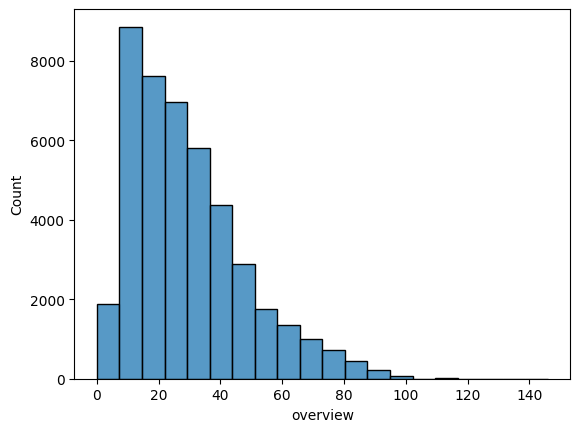

In [523]:
sns.histplot(eval_df, bins=20)

In [524]:
# Creamos esta funcion. Lo que queremos hacer es eliminar palabras de los Overview con mucho texto
def remove_items(word_list: list):
    while len(word_list)>50:
        word_list.pop()
    return word_list

In [ ]:
# creamos un dataset de prueba
eval_df = modified_df["overview"].head(1000)

In [ ]:
# verificamos las estadisticas previas a la aplicacion
eval_df.apply(len).describe()

count    1000.000000
mean       27.233000
std        12.860642
min         2.000000
25%        17.000000
50%        26.000000
75%        35.000000
max       102.000000
Name: overview, dtype: float64

In [ ]:
# observamos el max en 50, lo que indica que se logró reducir las palabras correctamente.
eval_df.apply(remove_items).apply(len).describe()

count    1000.00000
mean       26.68300
std        11.19669
min         2.00000
25%        17.00000
50%        26.00000
75%        35.00000
max        50.00000
Name: overview, dtype: float64

In [535]:
# Aplicamos el tratamiento al dataset.
movies_df = modified_df.copy()
movies_df["overview"] = movies_df["overview"].apply(remove_items)

### Aplicacion TF-IDF

In [ ]:
#importamos nuestro modelo TFIDFVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# hacemos una prueba de 1000 filas.
tfidf_vectorizer = TfidfVectorizer(max_features=50)
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['overview'].apply(" ".join).head(1000))
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
# El resultado se obtuvo rapidamente. 0.0s 
tfidf_df

,american,begin,city,come,day,death,director,discover,fall,family,...,town,try,war,way,wife,woman,work,world,year,young
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.000000,0.705739,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
996,0.0,0.0,0.0,0.345017,0.341939,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.309352,0.346597,0.000000,0.320523,0.274932
997,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.275431,0.000000,0.256401,0.000000,0.000000
998,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
#Creamos una matrix a partir de nuestro dataframe entero.
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['overview'].apply(" ".join))
movies_overview_vectorized = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
movies_overview_vectorized
#Tiempo de ejecución de 1s.

,begin,boy,come,daughter,day,discover,fall,family,father,film,...,try,turn,war,way,wife,woman,work,world,year,young
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.477451,0.000000,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.700502,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44008,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.703399,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
44009,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.387097,...,0.433464,0.000000,0.00000,0.0,0.0,0.401822,0.000000,0.0,0.0,0.352589
44010,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
44011,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.34081,0.0,0.0,0.000000,0.643292,0.0,0.0,0.508444


In [ ]:
# El downside es que incrementa el peso a 16.8Megas. Talvez queramos reducir la dimensionalidad con PCA
movies_overview_vectorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44013 entries, 0 to 44012
Data columns (total 50 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   begin     44013 non-null  float64
 1   boy       44013 non-null  float64
 2   come      44013 non-null  float64
 3   daughter  44013 non-null  float64
 4   day       44013 non-null  float64
 5   discover  44013 non-null  float64
 6   fall      44013 non-null  float64
 7   family    44013 non-null  float64
 8   father    44013 non-null  float64
 9   film      44013 non-null  float64
 10  find      44013 non-null  float64
 11  force     44013 non-null  float64
 12  friend    44013 non-null  float64
 13  get       44013 non-null  float64
 14  girl      44013 non-null  float64
 15  go        44013 non-null  float64
 16  good      44013 non-null  float64
 17  help      44013 non-null  float64
 18  home      44013 non-null  float64
 19  kill      44013 non-null  float64
 20  lead      44013 non-null  fl

### Aplicacion PCA

In [560]:
from sklearn.decomposition import PCA

In [561]:
# Definimos 10 componentes / Numero aleatorio, en un entorno real, deberiamos probar varios valores y resultados.
pca = PCA(n_components=10)
movies_overview_vectorized_reduced = pca.fit_transform(movies_overview_vectorized)

In [ ]:
movies_overview_vectorized_reduced

array([[-0.05924496,  0.28794567, -0.12954664, ...,  0.2766786 ,
        -0.02154161,  0.01492404],
       [-0.07005963,  0.48784599,  0.37333743, ...,  0.01667425,
         0.05293167,  0.0381219 ],
       [-0.00396277, -0.0333207 , -0.02492836, ..., -0.04065877,
        -0.0019588 , -0.04129712],
       ...,
       [-0.16590506, -0.21352687,  0.02286791, ..., -0.00112684,
         0.03079892,  0.04951495],
       [-0.0898872 , -0.07900334,  0.20141284, ..., -0.00488828,
        -0.11807203, -0.0028048 ],
       [-0.09193355, -0.09097795,  0.24242028, ...,  0.0234973 ,
        -0.22580389,  0.00868521]])

In [570]:
#Convertimos a pandas dataframe.
movies_overview_vectorized_reduced_df = pd.DataFrame(movies_overview_vectorized_reduced, columns=[f'Overview_pca_{i+1}' for i in range (movies_overview_vectorized_reduced.shape[1])])
movies_overview_vectorized_reduced_df.head(5)

,Overview_pca_1,Overview_pca_2,Overview_pca_3,Overview_pca_4,Overview_pca_5,Overview_pca_6,Overview_pca_7,Overview_pca_8,Overview_pca_9,Overview_pca_10
0,-0.059245,0.287946,-0.129547,-0.008717,-0.191959,0.032205,-0.046159,0.276679,-0.021542,0.014924
1,-0.070060,0.487846,0.373337,0.431613,-0.056732,0.472987,-0.241054,0.016674,0.052932,0.038122
2,-0.003963,-0.033321,-0.024928,-0.062604,-0.013472,0.006061,-0.011053,-0.040659,-0.001959,-0.041297
3,-0.053165,-0.077903,-0.042561,-0.071470,-0.045343,0.025141,-0.054225,-0.101491,-0.045622,-0.188094
4,-0.026597,-0.053522,-0.041591,-0.089935,-0.019957,0.038030,0.007911,-0.063810,-0.025875,-0.053301


In [574]:
movies_ml_df = movies_df.merge(movies_overview_vectorized_reduced_df, left_index=True, right_index=True)
movies_ml_df.drop(columns=["overview"], inplace=True)
movies_ml_df.head(5)

,id,release_year,vote_average,popularity_log,vote_count_log,title_collection,concat_country_language,genres,production_companies,Overview_pca_1,Overview_pca_2,Overview_pca_3,Overview_pca_4,Overview_pca_5,Overview_pca_6,Overview_pca_7,Overview_pca_8,Overview_pca_9,Overview_pca_10
0,2,1988,7.1,1.581139,3.806662,"(ariel,)","(de, fi)","(Drama, Crime)","(Finnish Film Foundation, Villealfa Filmproduc...",-0.059245,0.287946,-0.129547,-0.008717,-0.191959,0.032205,-0.046159,0.276679,-0.021542,0.014924
1,3,1986,7.1,1.191529,3.583519,"(shadow, paradise)","(sv, en, fi)","(Comedy, Drama)","(Villealfa Filmproduction Oy,)",-0.070060,0.487846,0.373337,0.431613,-0.056732,0.472987,-0.241054,0.016674,0.052932,0.038122
2,5,1995,6.5,2.305240,6.291569,"(room,)","(en, us)","(Comedy, Crime)","(Miramax Films, A Band Apart)",-0.003963,-0.033321,-0.024928,-0.062604,-0.013472,0.006061,-0.011053,-0.040659,-0.001959,-0.041297
3,6,1993,6.4,1.877734,4.382027,"(night, judgment)","(en, jp, us)","(Action, Crime, Thriller)","(Universal Pictures, Largo Entertainment, JVC ...",-0.053165,-0.077903,-0.042561,-0.071470,-0.045343,0.025141,-0.054225,-0.101491,-0.045622,-0.188094
4,11,1977,8.1,3.764675,8.821585,"(star, collection, war)","(en, us)","(Action, Adventure, Science Fiction)","(Lucasfilm, Twentieth Century Fox Film Corpora...",-0.026597,-0.053522,-0.041591,-0.089935,-0.019957,0.038030,0.007911,-0.063810,-0.025875,-0.053301


In [ ]:
#Peso en memoria de 6,4MB.
movies_ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44013 entries, 0 to 44012
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       44013 non-null  int64  
 1   release_year             44013 non-null  int64  
 2   vote_average             44013 non-null  float64
 3   popularity_log           44013 non-null  float64
 4   vote_count_log           44013 non-null  float64
 5   title_collection         44013 non-null  object 
 6   concat_country_language  44013 non-null  object 
 7   genres                   44013 non-null  object 
 8   production_companies     44013 non-null  object 
 9   Overview_pca_1           44013 non-null  float64
 10  Overview_pca_2           44013 non-null  float64
 11  Overview_pca_3           44013 non-null  float64
 12  Overview_pca_4           44013 non-null  float64
 13  Overview_pca_5           44013 non-null  float64
 14  Overview_pca_6        

In [576]:
movies_ml_df.to_csv("transformed_consultas/movies_ml_df.csv")

De esta manera finalizamos el tratamiento de datos de nuestra tabla.